## Graphs ##

In [1]:
# loading packages
library(repr)
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
# loading data
stroke <- read_csv("data/stroke-data.csv")
colnames(stroke)

Parsed with column specification:
cols(
  id = col_double(),
  gender = col_character(),
  age = col_double(),
  hypertension = col_double(),
  heart_disease = col_double(),
  ever_married = col_character(),
  work_type = col_character(),
  Residence_type = col_character(),
  avg_glucose_level = col_double(),
  bmi = col_character(),
  smoking_status = col_character(),
  stroke = col_double()
)



[1] "id"                "gender"            "age"              
 [4] "hypertension"      "heart_disease"     "ever_married"     
 [7] "work_type"         "Residence_type"    "avg_glucose_level"
[10] "bmi"               "smoking_status"    "stroke"

In [3]:
# cleaning and wrangling
stroke_clean <- stroke %>%
    select(gender, age, hypertension, heart_disease, avg_glucose_level, bmi, smoking_status, stroke) %>%
    mutate(gender = as_factor(gender), 
           bmi = as.numeric(bmi),
           smoking_status = as_factor(smoking_status),
           stroke = as_factor(stroke))

Warning message:
“Problem with `mutate()` input `bmi`.
ℹ NAs introduced by coercion
ℹ Input `bmi` is `as.numeric(bmi)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


In [4]:
head(stroke_clean)

gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
Male,67,0,1,228.69,36.6,formerly smoked,1
Female,61,0,0,202.21,NA,never smoked,1
Male,80,0,1,105.92,32.5,never smoked,1
Female,49,0,0,171.23,34.4,smokes,1
Female,79,1,0,174.12,24.0,never smoked,1
Male,81,0,0,186.21,29.0,formerly smoked,1


In [5]:
num_obs <- nrow(stroke_clean)
stroke_count <- stroke_clean %>%
  group_by(stroke) %>%
  summarize(
    count = n(),
    percentage = n() / num_obs * 100
  )
stroke_count

`summarise()` ungrouping output (override with `.groups` argument)



stroke,count,percentage
<fct>,<int>,<dbl>
0,4861,95.127202
1,249,4.872798


In [6]:
# data splitting
set.seed(1)

stroke_split <- initial_split(stroke_clean, prop = 0.75, strata = stroke)
stroke_train <- training(stroke_split)
stroke_test <- testing(stroke_split)

In [7]:
stroke_train_proportions <- stroke_train %>%
                      group_by(stroke) %>%
                      summarize(n = n()) %>%
                      mutate(percent = 100*n/nrow(stroke_train))
stroke_test_proportions <- stroke_test %>%
                      group_by(stroke) %>%
                      summarize(n = n()) %>%
                      mutate(percent = 100*n/nrow(stroke_test))
stroke_train_proportions
stroke_test_proportions

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



stroke,n,percent
<fct>,<int>,<dbl>
0,3656,95.382207
1,177,4.617793


stroke,n,percent
<fct>,<int>,<dbl>
0,1205,94.361785
1,72,5.638215


## start graphs ##

#### gluclose ####

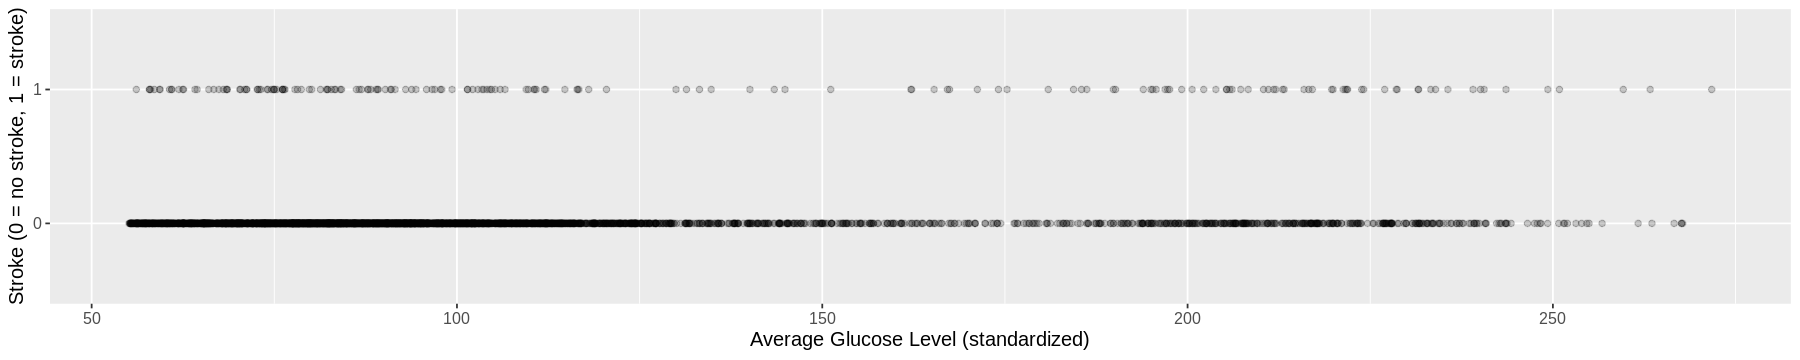

In [23]:
options(repr.plot.width = 15, repr.plot.height = 3)
gluc <- stroke_train %>%
  ggplot(aes(x = avg_glucose_level, y = stroke)) +
  geom_point(alpha = 0.2) +
  labs(x = "Average Glucose Level (standardized)", 
       y = "Stroke (0 = no stroke, 1 = stroke)") +
  theme(text = element_text(size = 12))
gluc

#### histograms ####

Warning message:
“Removed 157 rows containing non-finite values (stat_bin).”


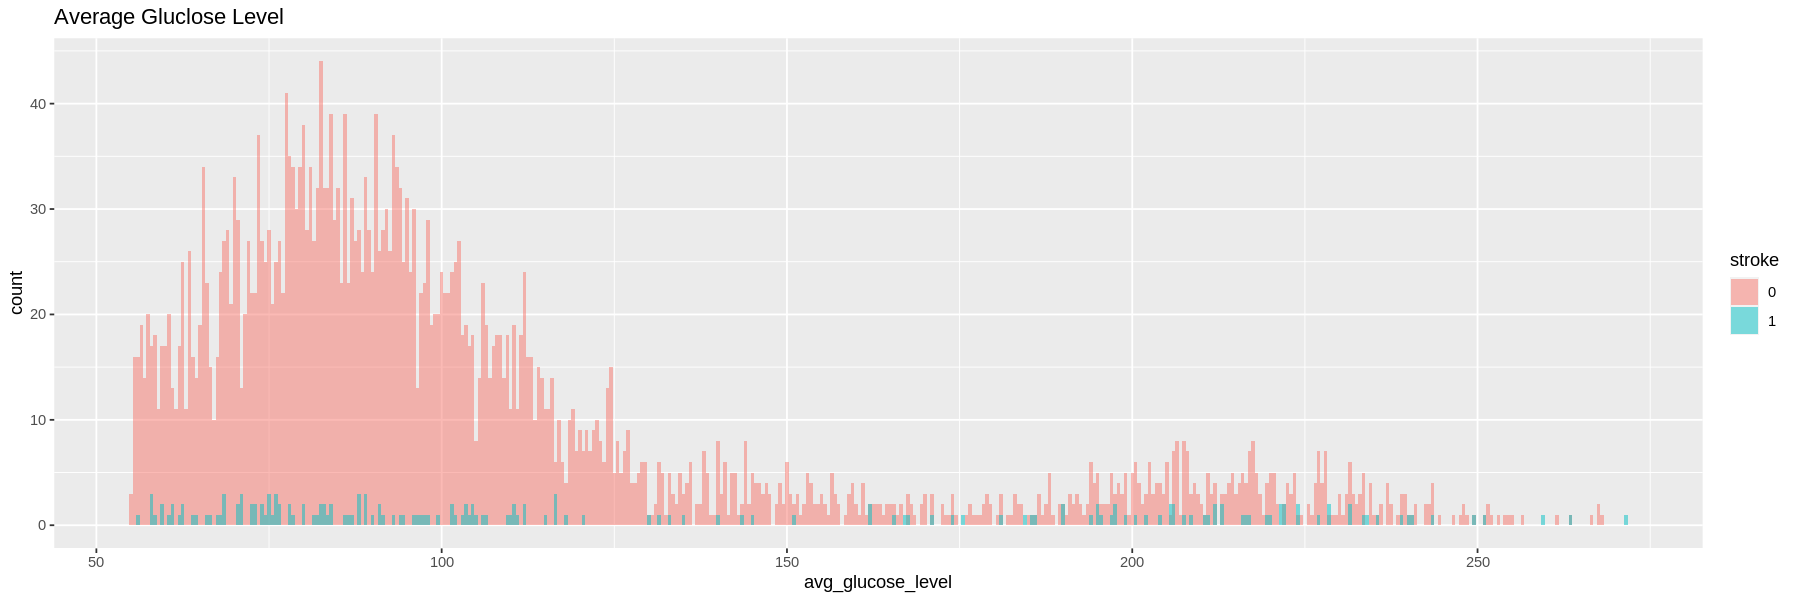

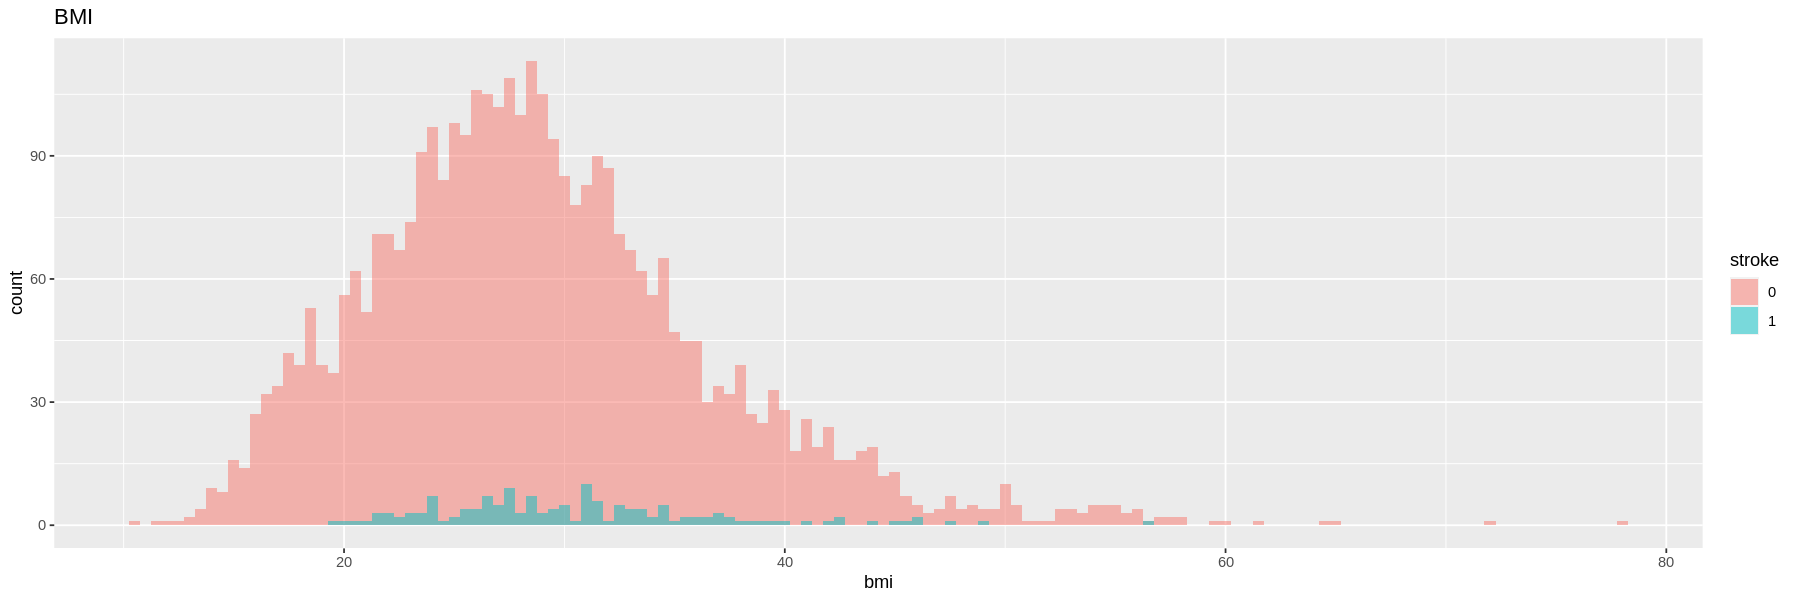

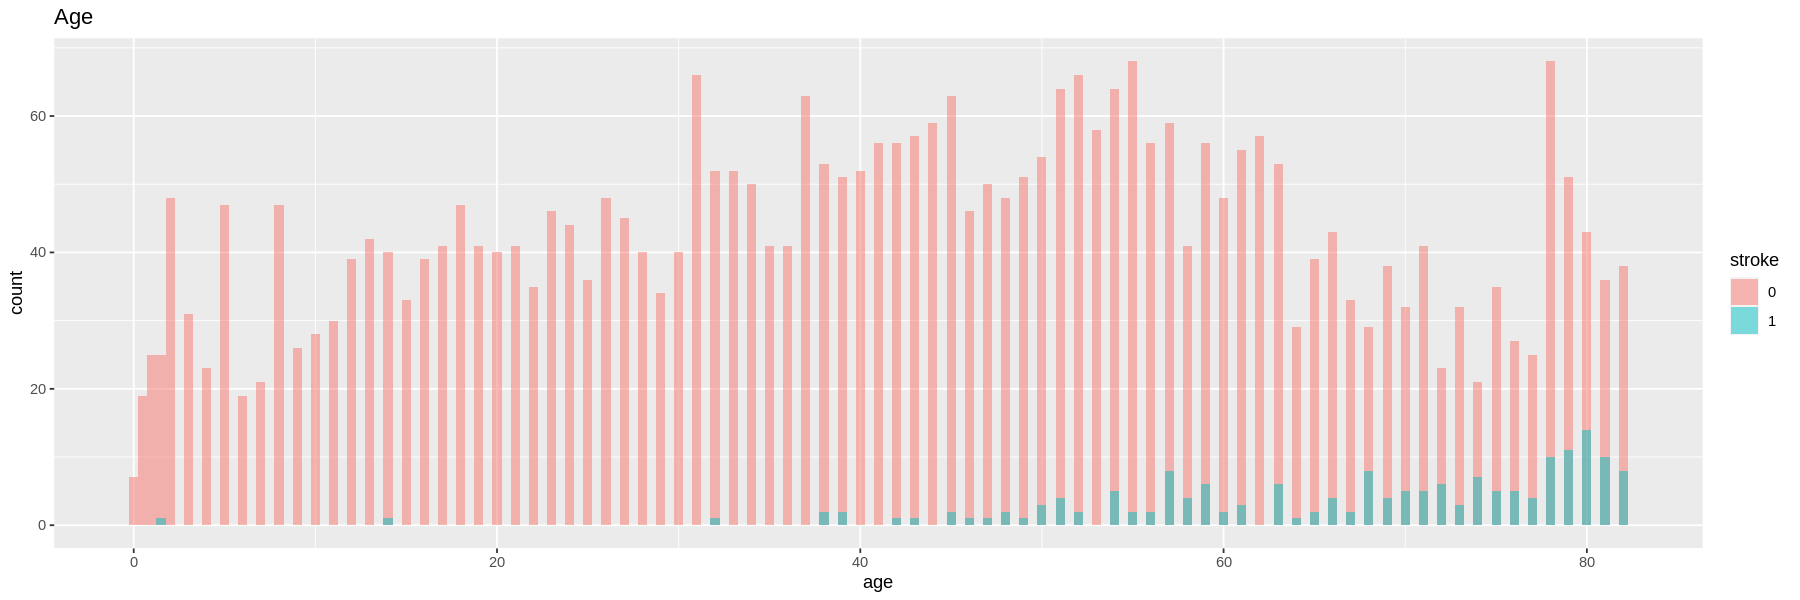

In [28]:
options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(stroke_train, aes(x=avg_glucose_level, fill=stroke)) +
    geom_histogram(binwidth=.5, alpha=.5, position="identity") +
    ggtitle("Average Gluclose Level")
ggplot(stroke_train, aes(x=bmi, fill=stroke)) +
    geom_histogram(binwidth=.5, alpha=.5, position="identity") +
    ggtitle("BMI")
ggplot(stroke_train, aes(x=age, fill=stroke)) +
    geom_histogram(binwidth=.5, alpha=.5, position="identity") +
    ggtitle("Age")

#### comparisons ####

Warning message:
“Removed 157 rows containing missing values (geom_point).”


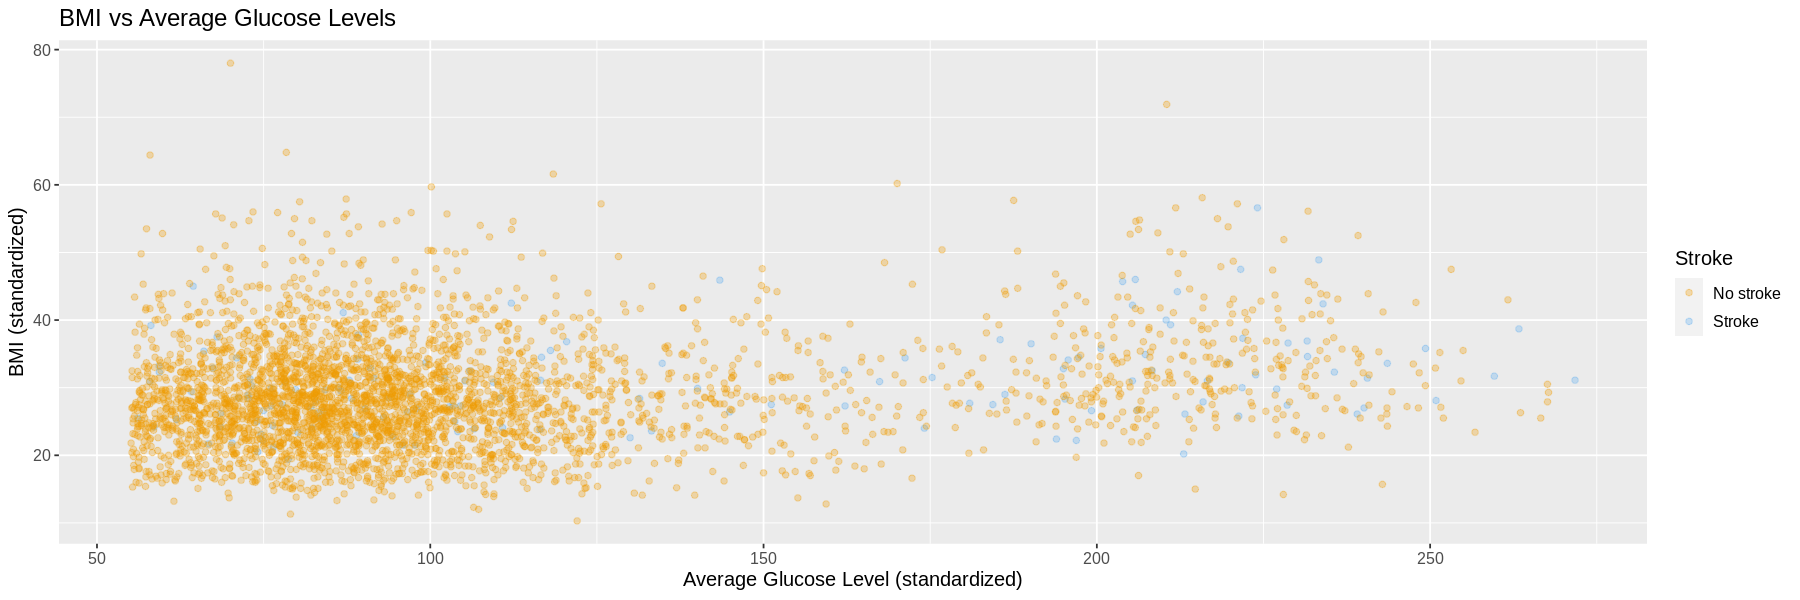

Warning message:
“Removed 157 rows containing missing values (geom_point).”


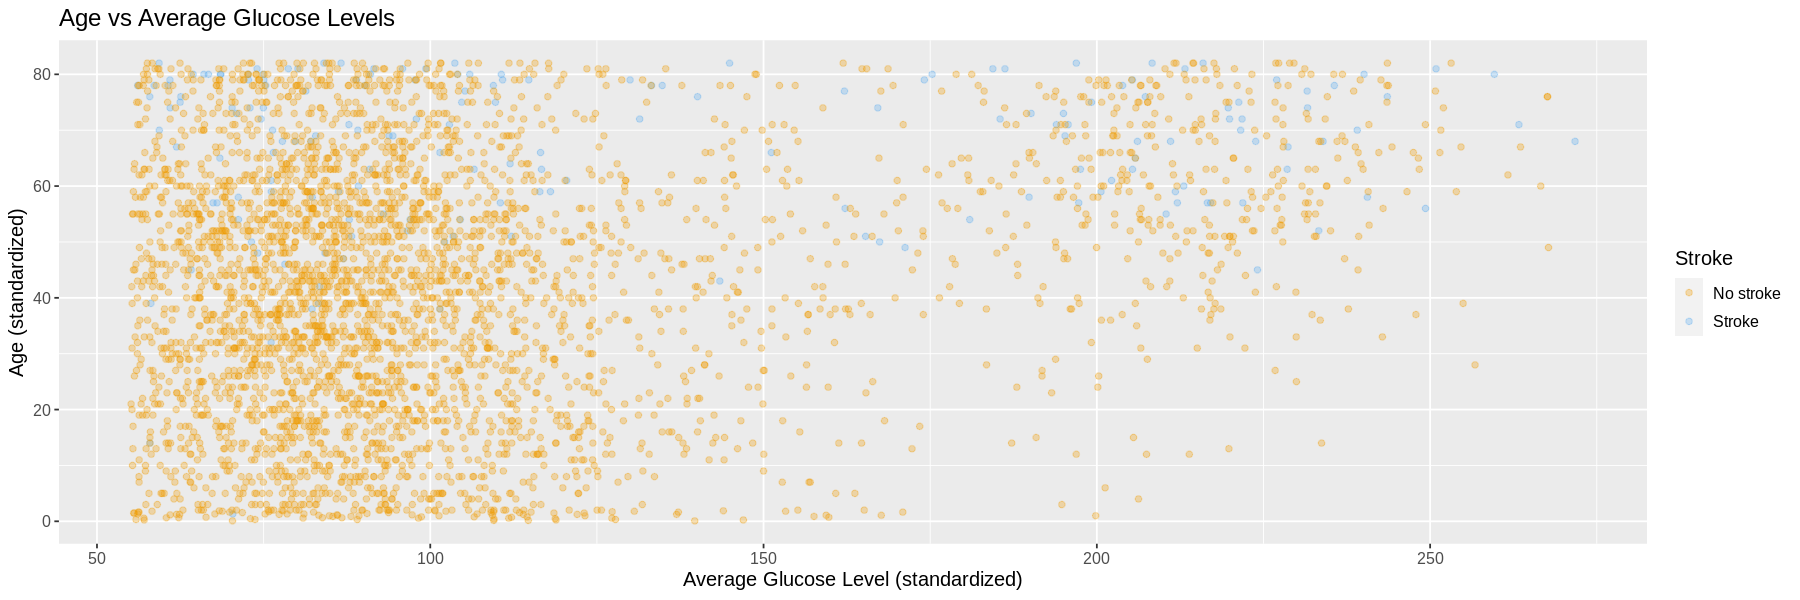

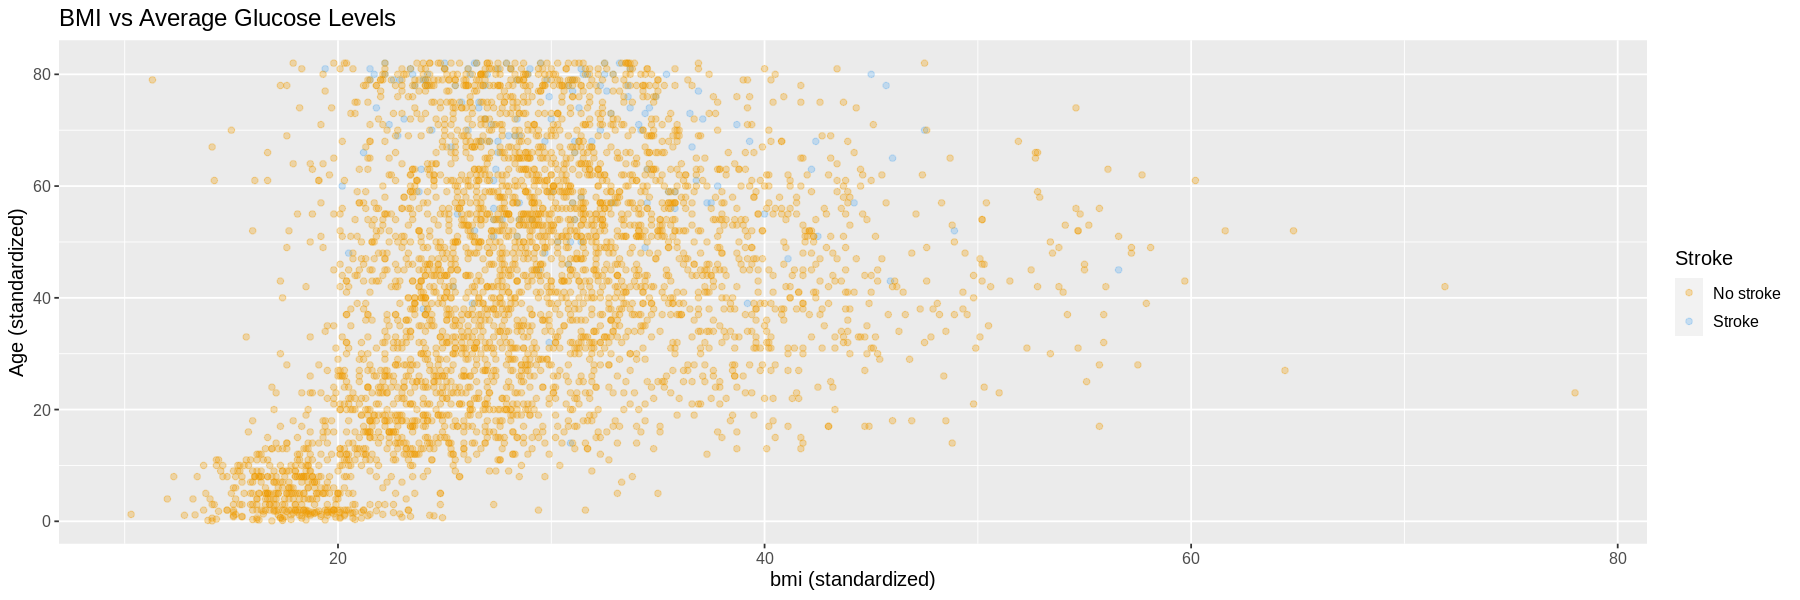

In [34]:
options(repr.plot.width = 15, repr.plot.height = 5)

gluc_bmi <- stroke_train %>%
  ggplot(aes(x = avg_glucose_level, y = bmi, color = stroke)) +
  geom_point(alpha = 0.3) +
  labs(x = "Average Glucose Level (standardized)", 
       y = "BMI (standardized)",
       color = "Stroke") +
  scale_color_manual(labels = c("No stroke", "Stroke"), 
                     values = c("orange2", "steelblue2")) +
  theme(text = element_text(size = 12)) +
  ggtitle("BMI vs Average Glucose Levels")
gluc_bmi

gluc_age <- stroke_train %>%
  ggplot(aes(x = avg_glucose_level, y = age, color = stroke)) +
  geom_point(alpha = 0.3) +
  labs(x = "Average Glucose Level (standardized)", 
       y = "Age (standardized)",
       color = "Stroke") +
  scale_color_manual(labels = c("No stroke", "Stroke"), 
                     values = c("orange2", "steelblue2")) +
  theme(text = element_text(size = 12)) +
  ggtitle("Age vs Average Glucose Levels")
gluc_age

bmi_age <- stroke_train %>%
  ggplot(aes(x = bmi, y = age, color = stroke)) +
  geom_point(alpha = 0.3) +
  labs(x = "bmi (standardized)", 
       y = "Age (standardized)",
       color = "Stroke") +
      scale_color_manual(labels = c("No stroke", "Stroke"), 
                         values = c("orange2", "steelblue2")) +
  theme(text = element_text(size = 12)) +
  ggtitle("BMI vs Average Glucose Levels")
bmi_age

#### categorical ####

`summarise()` regrouping output by 'gender' (override with `.groups` argument)

`summarise()` regrouping output by 'smoking_status' (override with `.groups` argument)



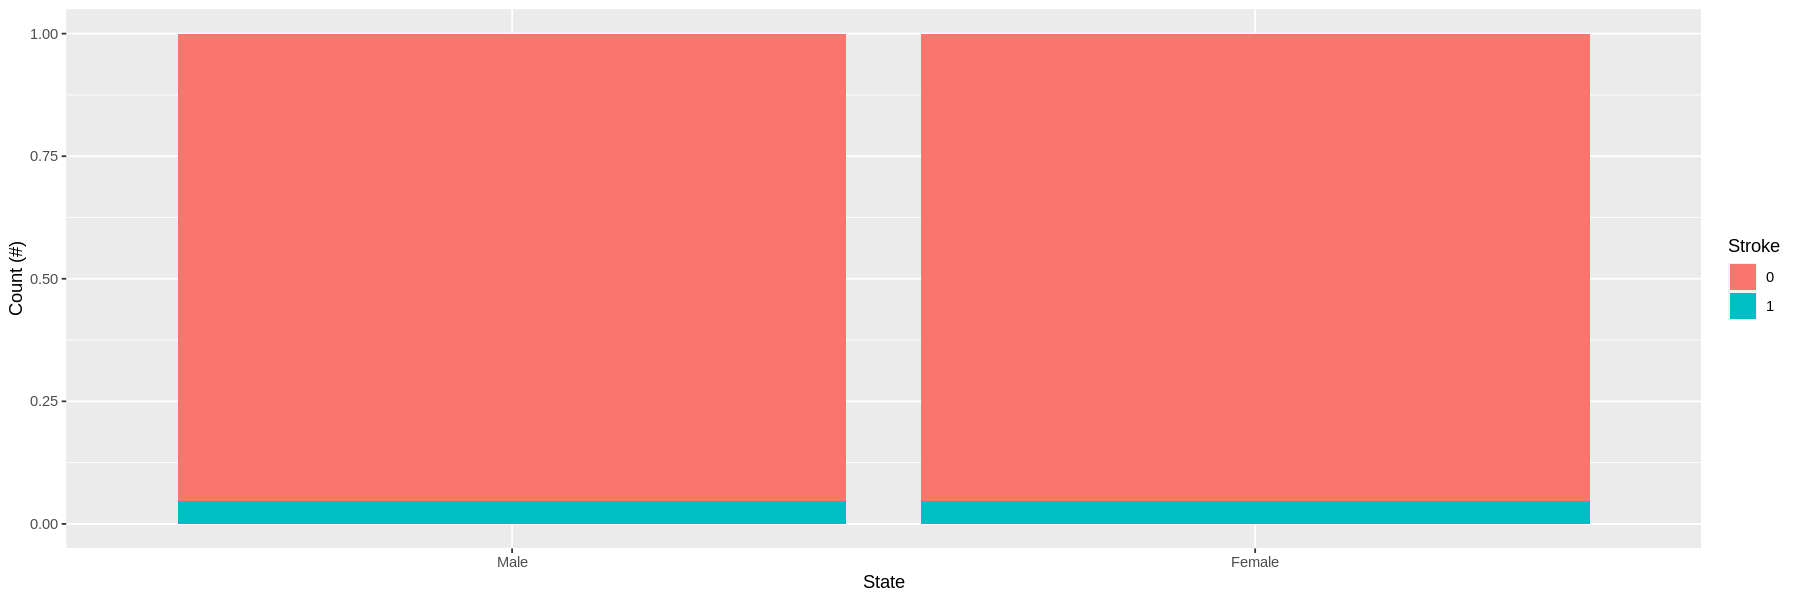

`summarise()` regrouping output by 'hypertension' (override with `.groups` argument)



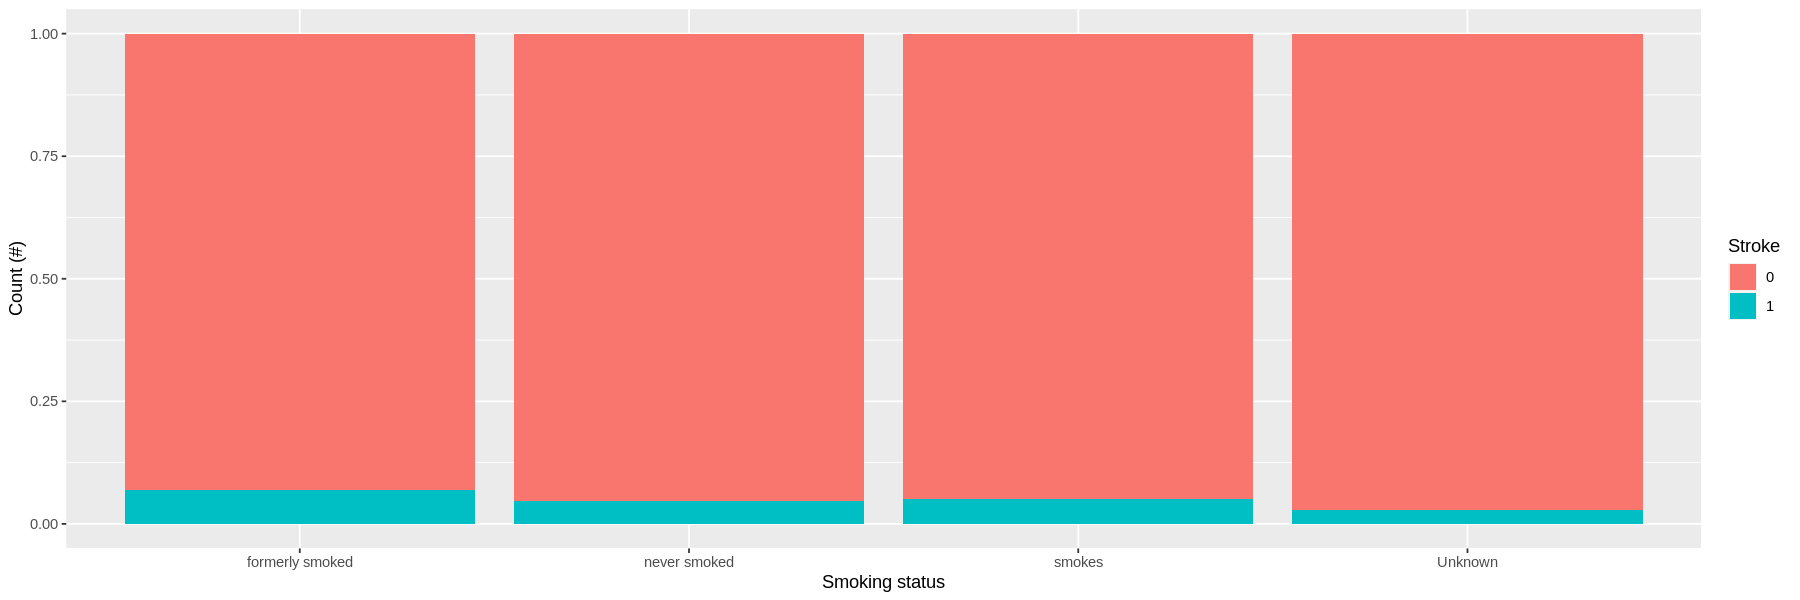

`summarise()` regrouping output by 'heart_disease' (override with `.groups` argument)



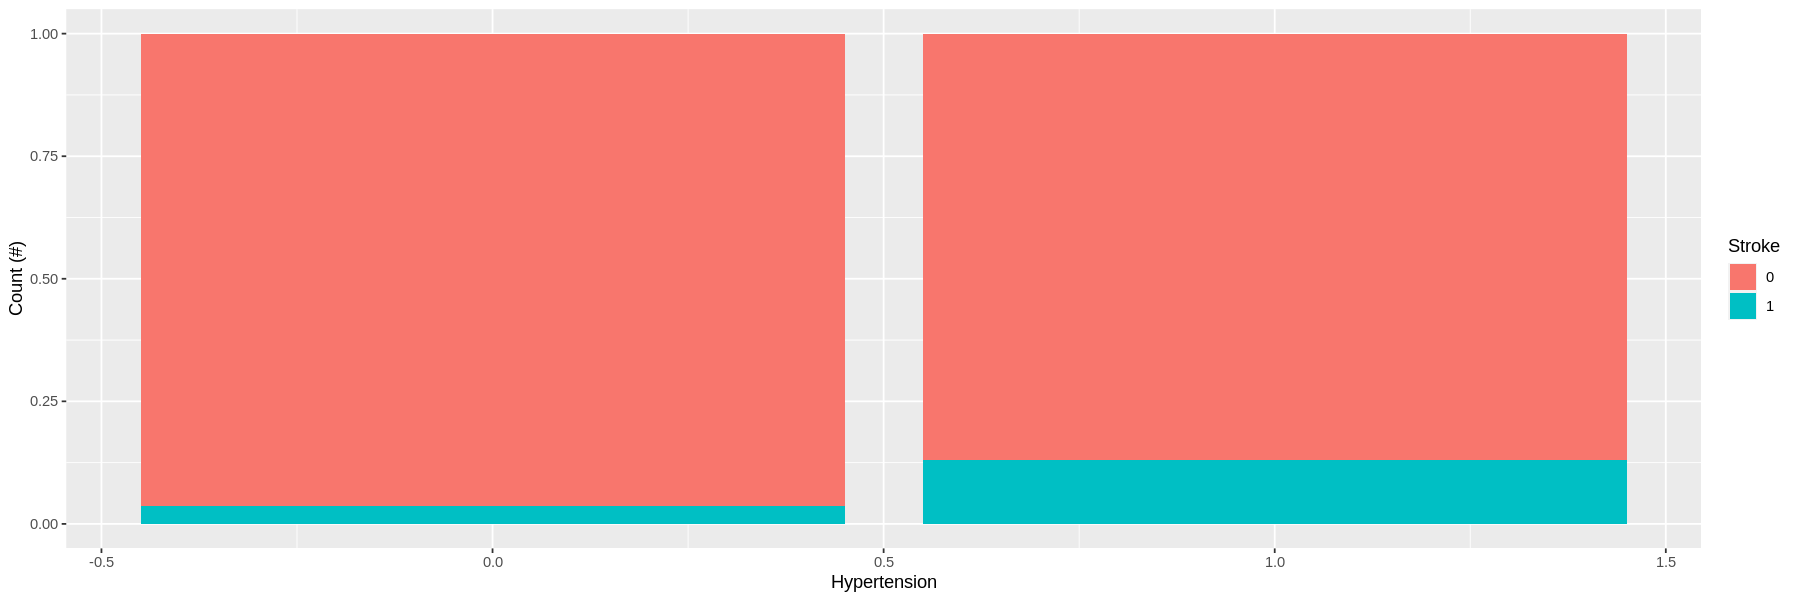

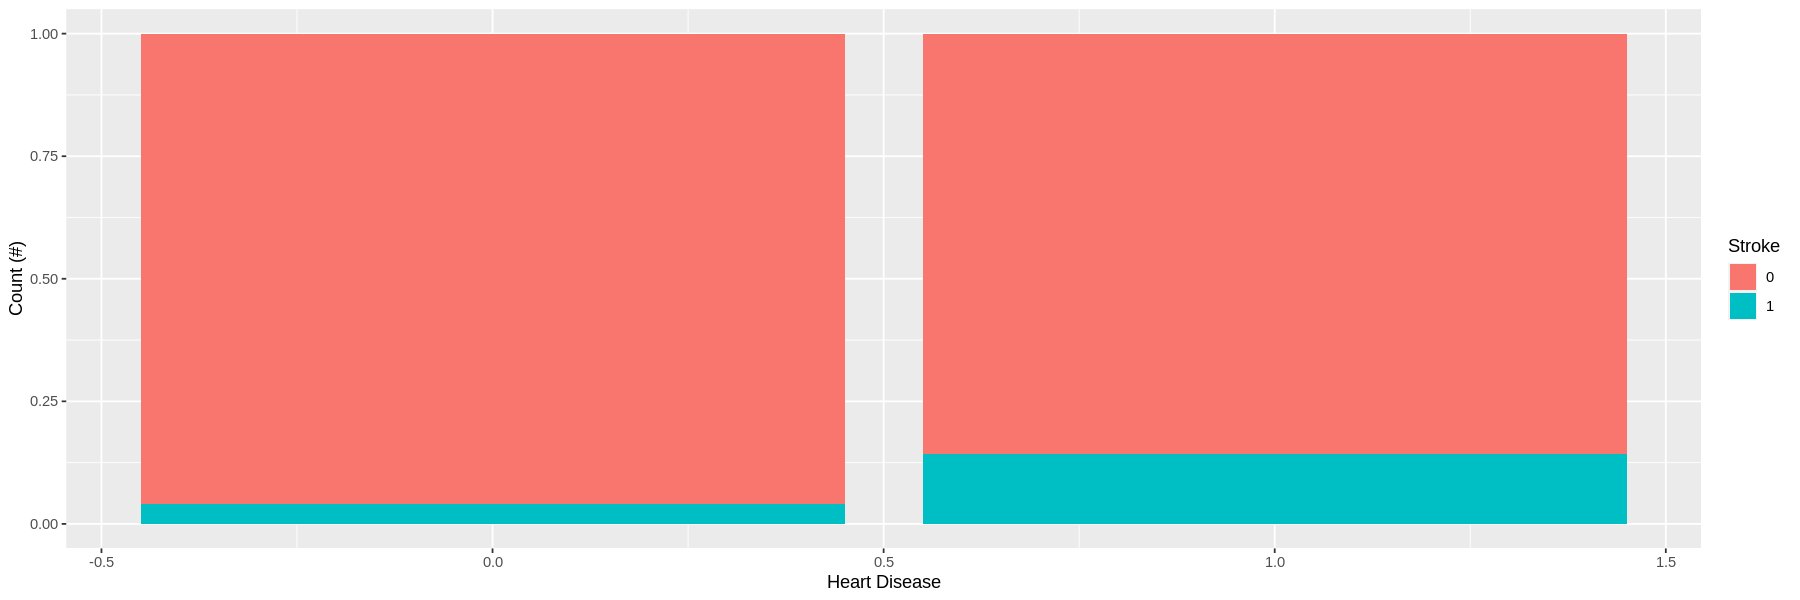

In [55]:
# gender
gender_count <- stroke_train %>% 
    filter(gender != "Other") %>% 
    group_by(gender, stroke) %>%
    summarise(n = n())

gender_plot <- ggplot(gender_count, aes(x = gender, y = n, fill = stroke)) + 
   geom_bar(stat = "identity", position = "fill") + 
  xlab("State") + 
  ylab("Count (#)") + 
  labs(fill = "Stroke") 
gender_plot

# smoking status
smoking_status_count <- stroke_train %>% 
    filter(gender != "Other") %>% 
    group_by(smoking_status, stroke) %>%
    summarise(n = n())

smoking_status_plot <- ggplot(smoking_status_count, aes(x = smoking_status, y = n, fill = stroke)) + 
   geom_bar(stat = "identity", position = "fill") + 
  xlab("Smoking status") + 
  ylab("Count (#)") + 
  labs(fill = "Stroke")
smoking_status_plot

# hypertension
hypertension_count <- stroke_train %>% 
    group_by(hypertension, stroke) %>%
    summarise(n = n())

hypertension_plot <- ggplot(hypertension_count, aes(x = hypertension, y = n, fill = stroke)) + 
   geom_bar(stat = "identity", position = "fill") + 
  xlab("Hypertension") + 
  ylab("Count (#)") + 
  labs(fill = "Stroke")
hypertension_plot

# hypertension
heart_disease_count <- stroke_train %>% 
    group_by(heart_disease, stroke) %>%
    summarise(n = n())

heart_disease_plot <- ggplot(heart_disease_count, aes(x = heart_disease, y = n, fill = stroke)) + 
   geom_bar(stat = "identity", position = "fill") + 
  xlab("Heart Disease") + 
  ylab("Count (#)") + 
  labs(fill = "Stroke")
heart_disease_plot

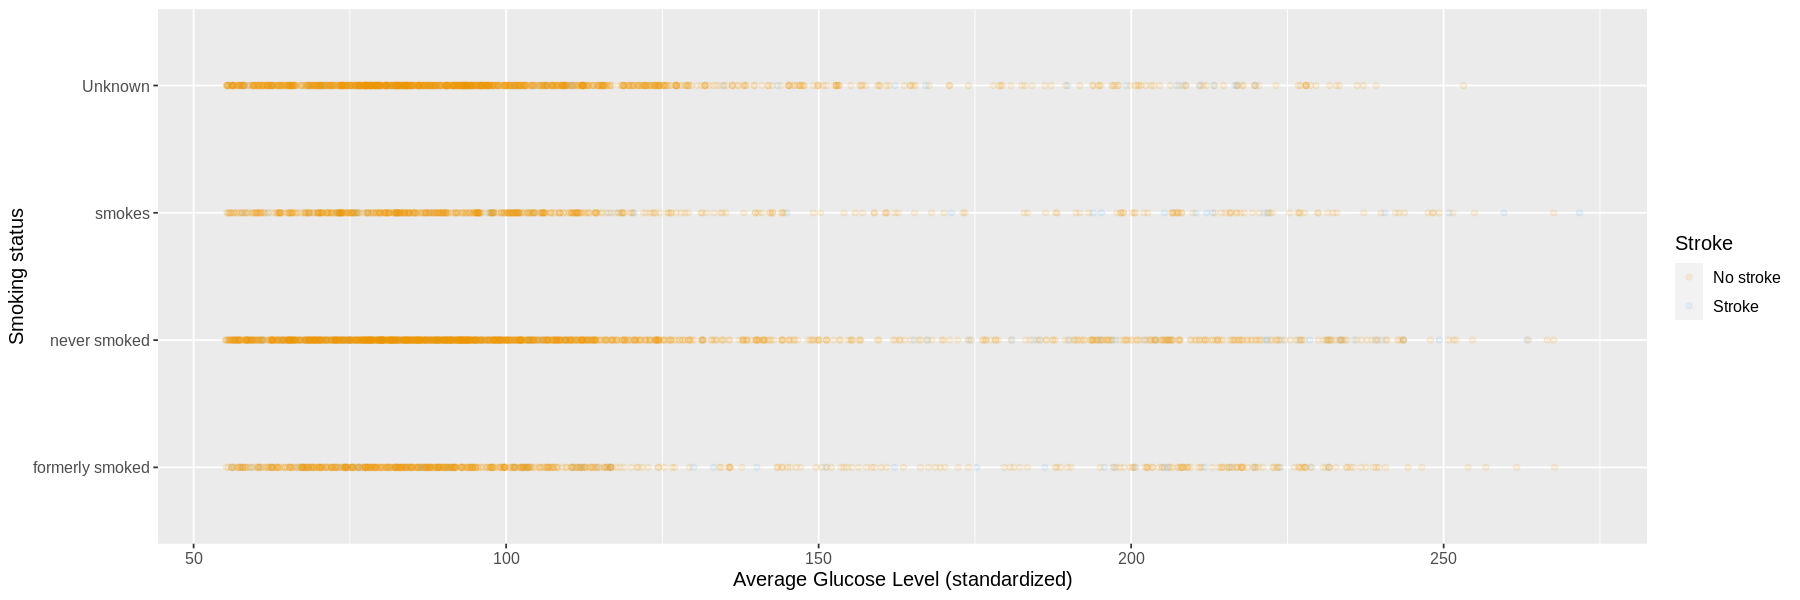

In [35]:
gluc_smoking <- stroke_train %>%
  ggplot(aes(x = avg_glucose_level, y = smoking_status, color = stroke)) +
  geom_point(alpha = 0.1) +
  labs(x = "Average Glucose Level (standardized)", 
       y = "Smoking status",
       color = "Stroke") +
  scale_color_manual(labels = c("No stroke", "Stroke"), 
                     values = c("orange2", "steelblue2")) +
  theme(text = element_text(size = 12))
gluc_smoking